## Cache Plots

In [106]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

PHYSICAL_CORES=64

def plot(p_data, p_yId, p_xId, p_hueId, p_styleId, p_logScale=False, p_smt_marker=False, p_export_filename=None, p_xLabel=None, p_yLabel=None):
    rcParams['figure.figsize'] = 12,8
    rcParams['font.size'] = 12
    rcParams['svg.fonttype'] = 'none'
    plot = sns.lineplot(x=p_xId,
                        y=p_yId,
                        hue=p_hueId,
                        style=p_styleId,
                        data=p_data)
    if p_logScale == True:
        plot.set_yscale('log')
        plot.set_xscale('log')
    
    
    if p_xLabel != None:
        plot.set(xlabel=p_xLabel)
    else:
        plot.set(xlabel=p_xId)

    if p_yLabel != None:
        plot.set(ylabel=p_yLabel)
    else:
        plot.set(ylabel=p_yId)


    plt.grid(color='gainsboro')
    plt.grid(True,which='minor', linestyle='--', linewidth=0.5, color='gainsboro') 

    if(p_smt_marker == True):
        plt.axvline(PHYSICAL_CORES, linestyle='--', color='red', label='using SMT')

    plt.legend()

    if(p_export_filename != None):
        plt.savefig(p_export_filename)

    plt.show()

### Gauss3

#### Efficiency by Threads

##### [1024 x 1024 x 1024]

/var/folders/zt/h71khkbd7ll9krscx1zncwlc0000gn/T/ipykernel_4750/2832361098.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ref_runtime = data_frame_copy[data_frame.impl_id == '\Verb{const_coeff}'][data_frame.threads == 1]['runtime'].values[0]


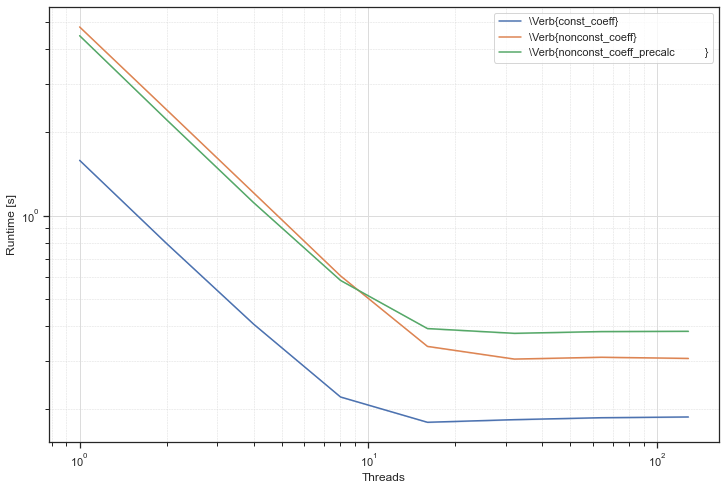

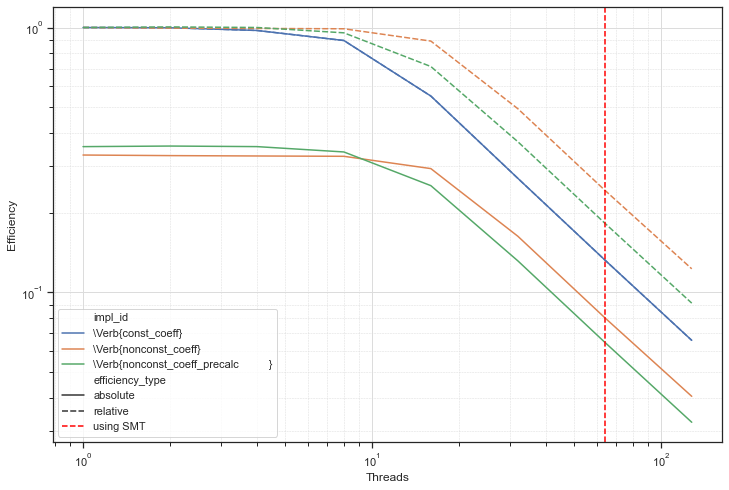

In [107]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

data_frame = pd.read_csv('./e_efficiency_by_threads.csv')

data_frame = data_frame[data_frame.region_id == 'apply']
data_frame = data_frame[data_frame.obj_cols == 1024]
data_frame['efficiency_type'] = 'relative'

#
# NOTE: calc absolute efficiency
#
data_frame_copy = data_frame.copy()
data_frame_copy['efficiency_type'] = 'absolute'
ref_runtime = data_frame_copy[data_frame.impl_id == '\Verb{const_coeff}'][data_frame.threads == 1]['runtime'].values[0]
data_frame_copy['efficiency']=data_frame_copy.apply(lambda row: ref_runtime/(row['runtime'] * row['threads']), axis=1)

data_frame = data_frame_copy.append(data_frame)

# display(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_export_filename='runtime_1024.svg',
    p_xLabel="Threads",
    p_yLabel="Runtime [s]")
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId='efficiency_type',
    p_logScale=True,
    p_smt_marker=True,
    p_export_filename='efficiency_1024.svg',
    p_xLabel="Threads",
    p_yLabel="Efficiency")

##### [1600 x 1600 x 1600]

/var/folders/zt/h71khkbd7ll9krscx1zncwlc0000gn/T/ipykernel_4750/3917809567.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ref_runtime = data_frame_copy[data_frame.impl_id == '\Verb{const_coeff}'][data_frame.threads == 1]['runtime'].values[0]


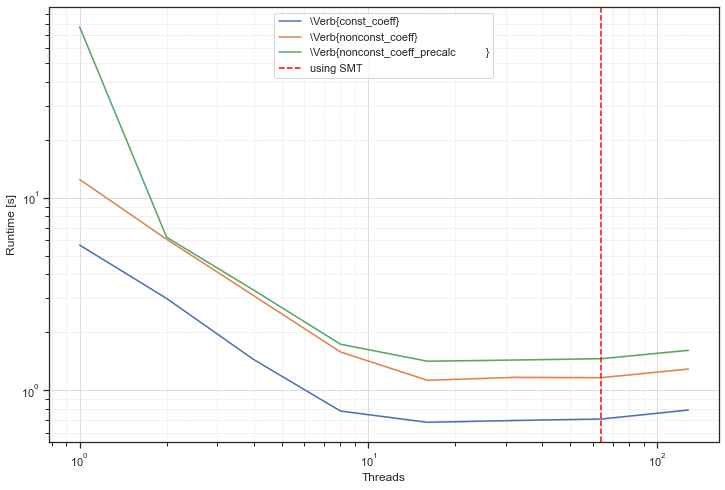

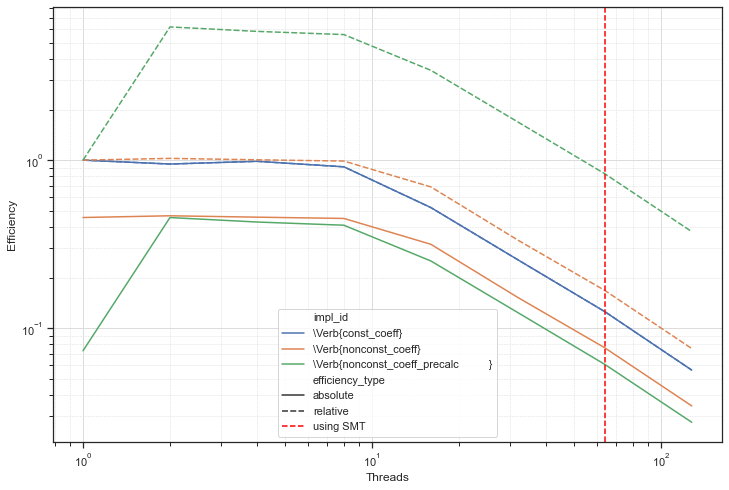

In [108]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

data_frame = pd.read_csv('./e_efficiency_by_threads.csv')

data_frame = data_frame[data_frame.region_id == 'apply']
data_frame = data_frame[data_frame.obj_cols == 1600]
data_frame['efficiency_type'] = 'relative'

#
# NOTE: calc absolute efficiency
#
data_frame_copy = data_frame.copy()
data_frame_copy['efficiency_type'] = 'absolute'
ref_runtime = data_frame_copy[data_frame.impl_id == '\Verb{const_coeff}'][data_frame.threads == 1]['runtime'].values[0]
data_frame_copy['efficiency']=data_frame_copy.apply(lambda row: ref_runtime/(row['runtime'] * row['threads']), axis=1)

data_frame = data_frame_copy.append(data_frame)

# display(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True,
    p_export_filename='runtime_1600.svg',
    p_xLabel="Threads",
    p_yLabel="Runtime [s]")
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId='efficiency_type',
    p_logScale=True,
    p_smt_marker=True,
    p_export_filename='efficiency_1600.svg',
    p_xLabel="Threads",
    p_yLabel="Efficiency")

#### Runtime By Cells

##### Multiple Threads

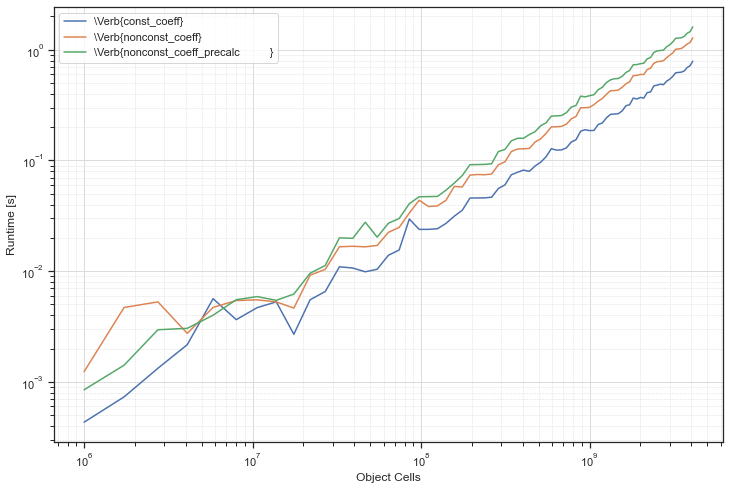

In [109]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

data_frame = pd.read_csv('./e_runtime_by_cells.csv')
data_frame = data_frame[data_frame.threads != 1]
data_frame = data_frame[data_frame.region_id == 'apply']

# display(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=False,
    p_export_filename='runtime_by_cells.svg',
    p_xLabel='Object Cells',
    p_yLabel='Runtime [s]')

#### Memory By Cells

##### Multiple Threads apply

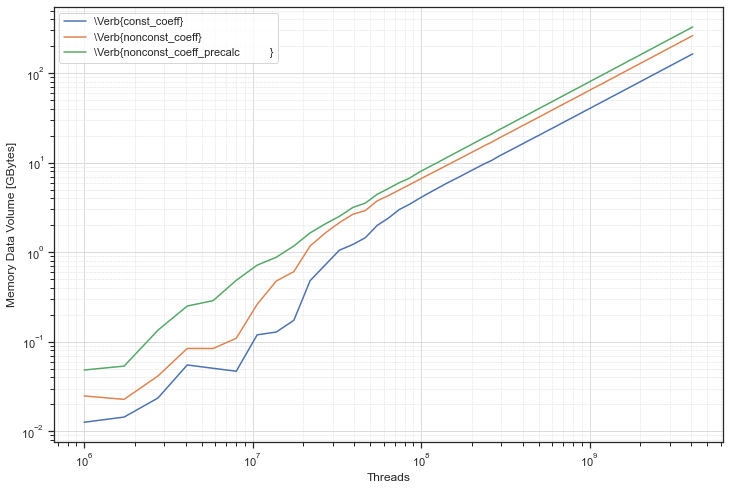

In [110]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_cells.csv')
data_frame = data_frame[data_frame.threads != 1]
data_frame = data_frame[data_frame.region_id == 'apply']

plot(p_data=data_frame,
    p_yId='memory_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=False,
    p_export_filename='memory_data_volume.svg',
    p_xLabel="Threads",
    p_yLabel='Memory Data Volume [GBytes]')

#### Memory By Threads

##### [1024 x 1024 x 1024]

,node_id,bench_id,impl_id,region_id,obj_cols,obj_rows,obj_levels,obj_cells,threads,l2d_load_bandwidth,l2d_load_data_volume,l2_bandwidth,l2_data_volume,l3_access_bandwidth,l3_access_data_volumen,l3_access_rate,l3_miss_rate,l3_miss_ratio,memory_bandwidth,memory_data_volume
0,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1024,1024,1024,1073741824,1,28593.4772,45.3475,28593.4772,45.3475,21840.6858,34.6221,5.7209,5.6876,99.4186,27193.5012,43.0461
2,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1024,1024,1024,1073741824,2,41455.8250,45.3676,41455.8250,45.3676,31867.7766,35.0593,5.7931,5.7146,49.3227,39123.8100,43.1281
4,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1024,1024,1024,1073741824,4,41127.0639,45.1530,41127.0639,45.1530,31645.7375,34.7109,5.7304,5.6893,24.8205,39303.1674,43.1175
6,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1024,1024,1024,1073741824,8,41454.4334,45.5882,41454.4334,45.5882,31735.3780,34.9182,5.7675,5.6838,24.6371,39176.4971,43.0799
8,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1024,1024,1024,1073741824,16,76615.9878,45.3986,76615.9878,45.3986,58851.2748,34.9126,5.7616,5.6770,24.6326,72582.1223,43.0856
10,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1024,1024,1024,1073741824,32,122547.4553,45.5642,122547.4553,45.5642,94061.1421,35.0142,5.7760,5.6762,24.5679,115922.0426,43.0721
12,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1024,1024,1024,1073741824,64,243872.9131,45.6333,243872.9131,45.6333,187723.7218,35.0404,5.7783,5.6758,24.5562,231746.0576,43.1994
14,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1024,1024,1024,1073741824,128,373195.9519,69.8522,373195.9519,69.8522,197635.9629,37.0760,6.1025,5.6583,11.5902,229351.9367,43.2706
16,gauss3,e_memory_by_threads,\Verb{nonconst_coeff},apply,1024,1024,1024,1073741824,1,44386.7451,213.1573,44386.7451,213.1573,13720.6797,65.6166,5.4371,4.9923,91.8183,14356.7536,68.9654
18,gauss3,e_memory_by_threads,\Verb{nonconst_coeff},apply,1024,1024,1024,1073741824,2,83077.2088,209.7939,83077.2088,209.7939,25984.5710,65.8466,5.4562,5.0176,45.9812,27269.5349,69.0546


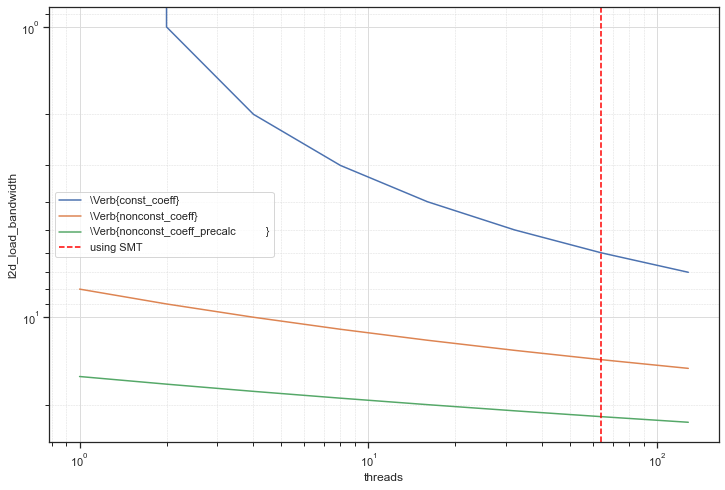

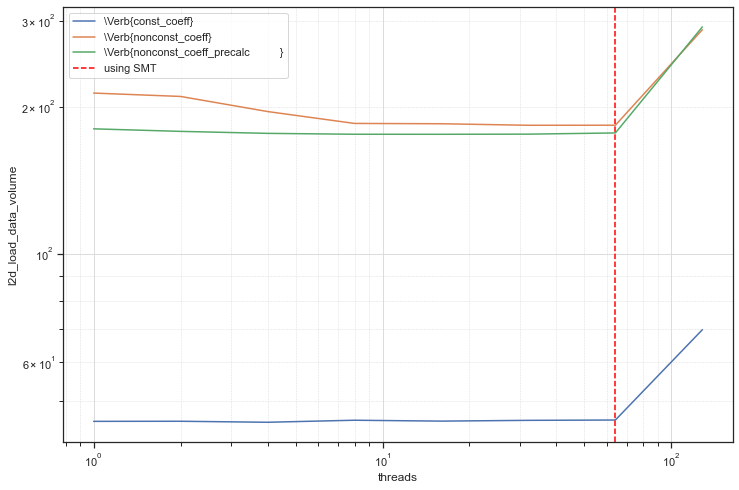

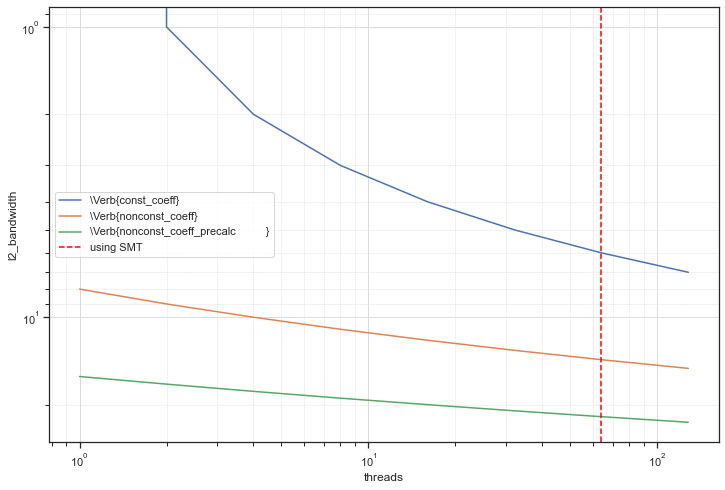

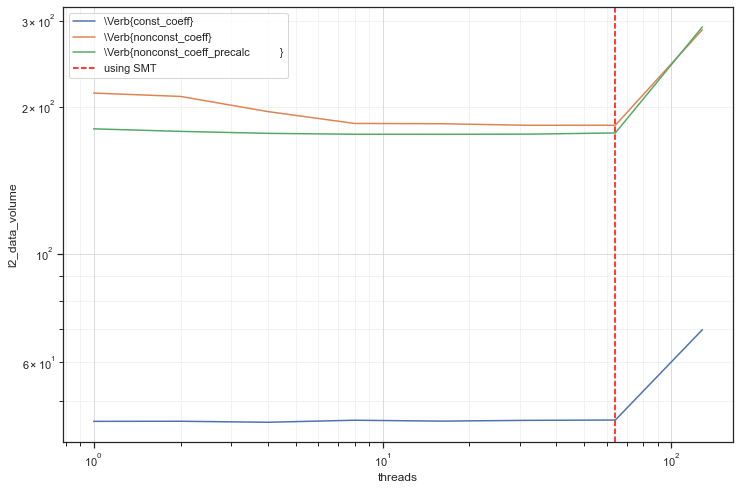

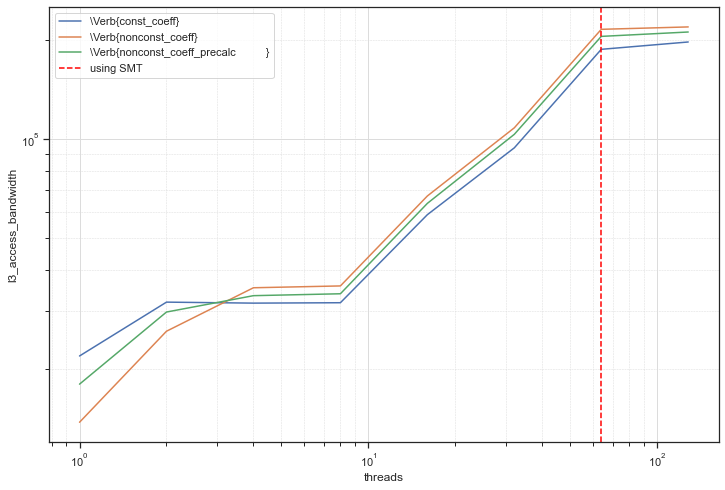

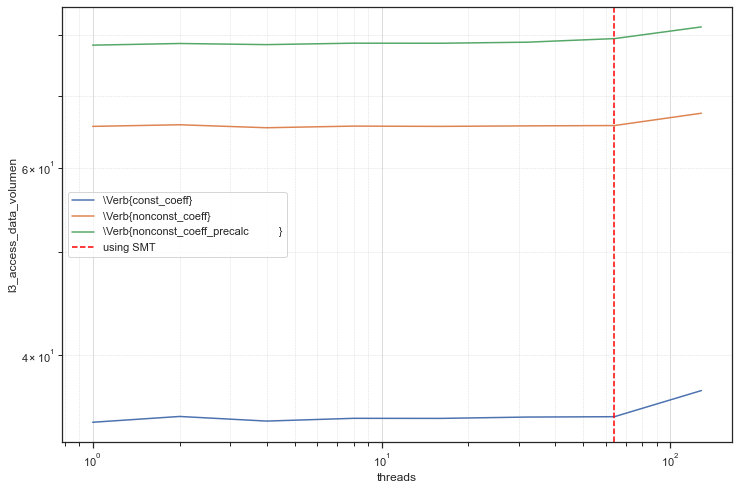

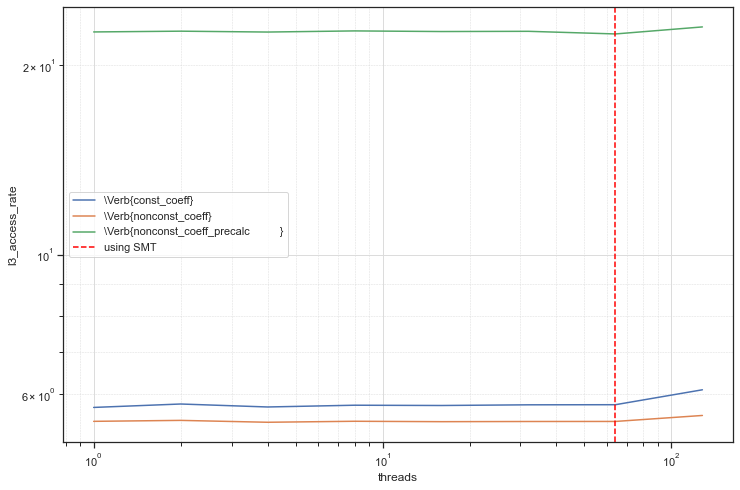

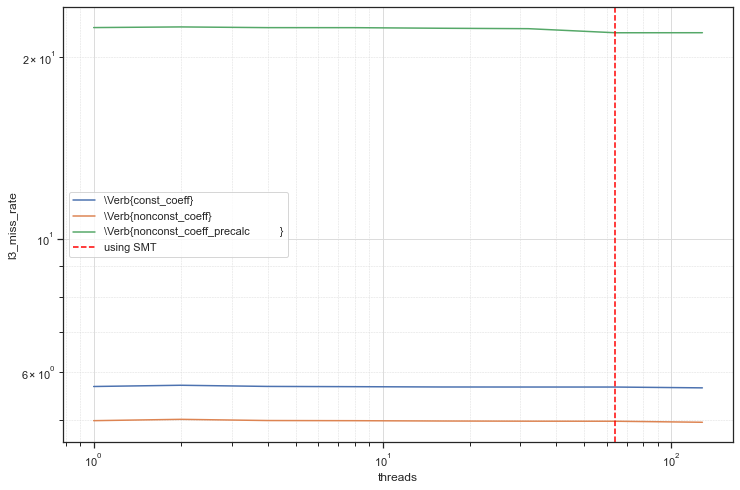

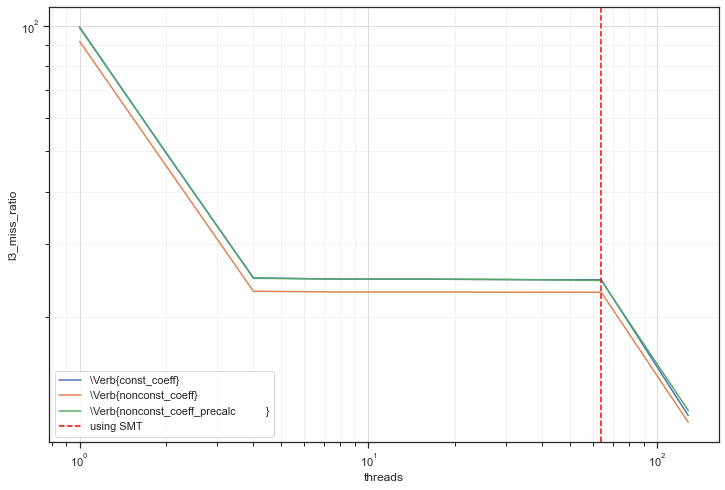

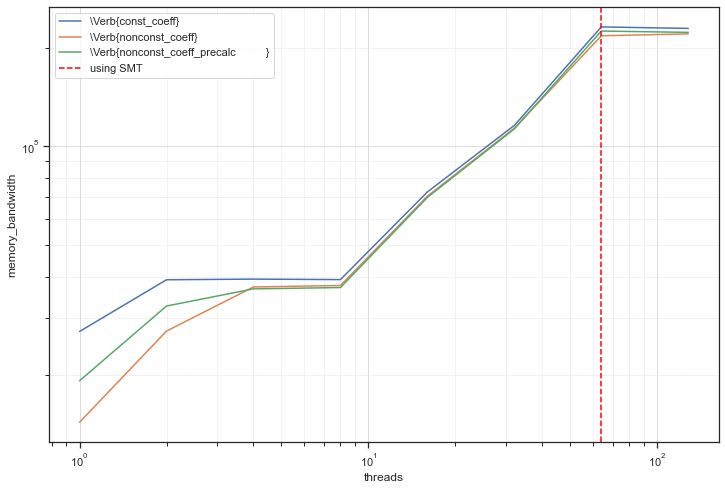

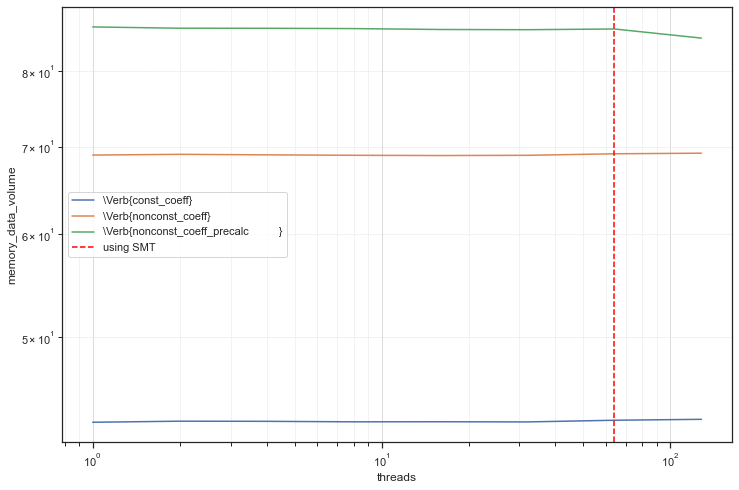

In [111]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_threads.csv')
data_frame = data_frame[data_frame.region_id == 'apply']
data_frame = data_frame[data_frame.obj_cols == 1024]

display(data_frame)

plot(p_data=data_frame,
    p_yId='l2d_load_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l2d_load_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l2_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l2_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_data_volumen',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_rate',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l3_miss_rate',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l3_miss_ratio',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='memory_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='memory_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)

##### [1600 x 1600 x 1600]

,node_id,bench_id,impl_id,region_id,obj_cols,obj_rows,obj_levels,obj_cells,threads,l2d_load_bandwidth,l2d_load_data_volume,l2_bandwidth,l2_data_volume,l3_access_bandwidth,l3_access_data_volumen,l3_access_rate,l3_miss_rate,l3_miss_ratio,memory_bandwidth,memory_data_volume
48,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1600,1600,1600,4096000000,1,34281.2757,198.7433,34281.2757,198.7433,22942.8693,133.2272,5.7843,5.7050,98.6291,28266.2639,164.2172
50,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1600,1600,1600,4096000000,2,47865.0718,199.4404,47865.0718,199.4404,32109.4918,133.0506,5.7766,5.7261,49.5630,39897.2801,164.4982
52,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1600,1600,1600,4096000000,4,47420.6771,198.5690,47420.6771,198.5690,31490.5648,131.9807,5.7288,5.7067,24.9036,39261.2313,164.4954
54,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1600,1600,1600,4096000000,8,47351.2626,198.2381,47351.2626,198.2381,31672.4755,132.5073,5.7503,5.6949,24.7592,39242.0765,164.2433
56,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1600,1600,1600,4096000000,16,88306.4691,198.7070,88306.4691,198.7070,58939.1458,132.5414,5.7499,5.6922,24.7489,72895.8851,164.2007
58,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1600,1600,1600,4096000000,32,140751.3848,198.7008,140751.3848,198.7008,94083.2967,132.8698,5.7593,5.6875,24.6882,116139.8014,164.0861
60,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1600,1600,1600,4096000000,64,279506.6780,198.2704,279506.6780,198.2704,188127.7472,133.0332,5.7590,5.6825,24.6677,232194.0200,164.3103
62,gauss3,e_memory_by_threads,\Verb{const_coeff},apply,1600,1600,1600,4096000000,128,263248.0988,203.3940,263248.0988,203.3940,175308.9778,134.9389,5.5933,5.4300,12.1357,212945.4392,164.3348
64,gauss3,e_memory_by_threads,\Verb{nonconst_coeff},apply,1600,1600,1600,4096000000,1,30888.1689,378.4931,30888.1689,378.4931,19226.3054,237.5793,5.1672,5.0101,96.9597,21350.7438,262.9750
66,gauss3,e_memory_by_threads,\Verb{nonconst_coeff},apply,1600,1600,1600,4096000000,2,51853.8950,377.3517,51853.8950,377.3517,32610.5942,232.2845,5.0518,5.0222,49.7078,36135.7747,263.2682


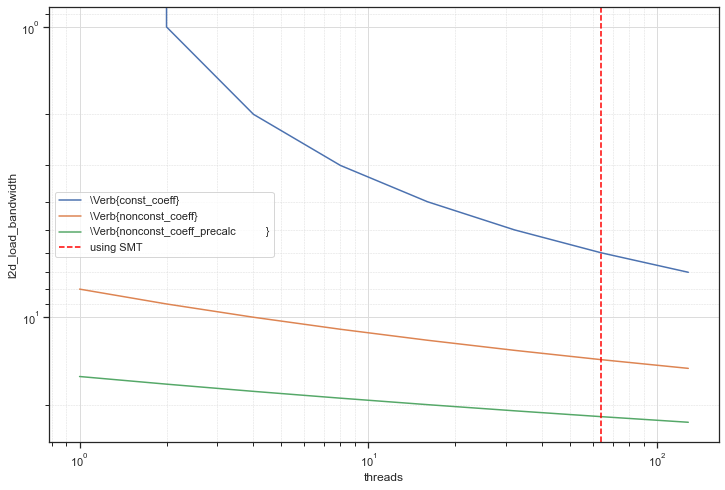

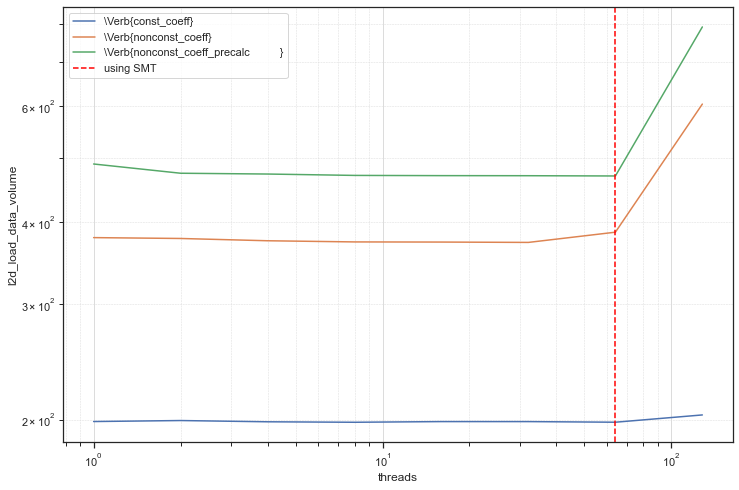

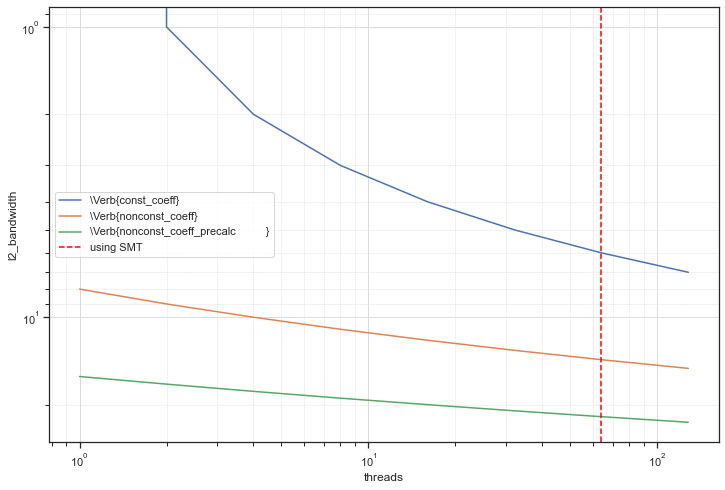

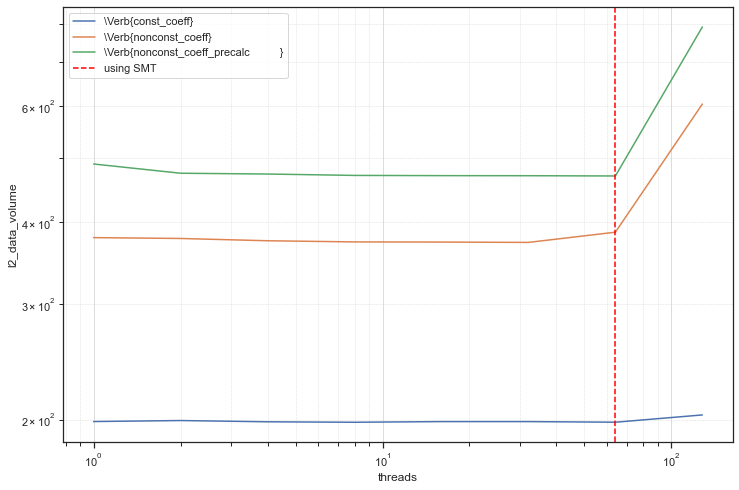

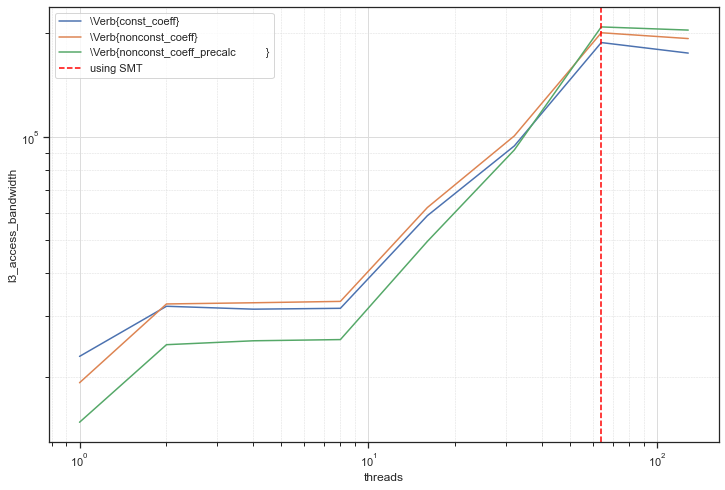

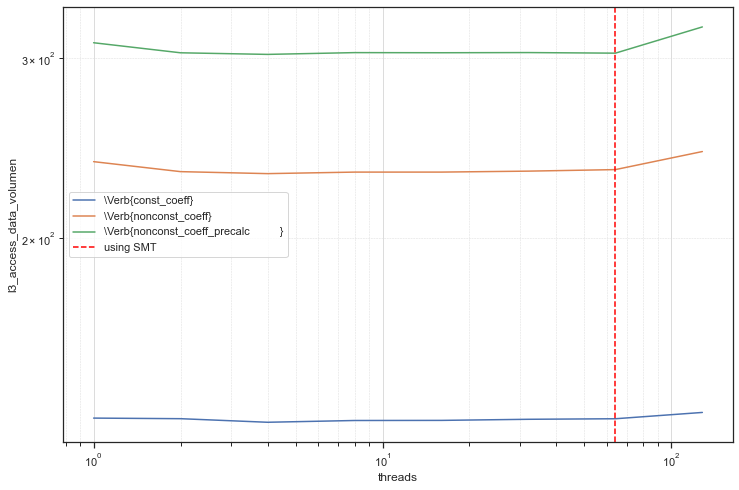

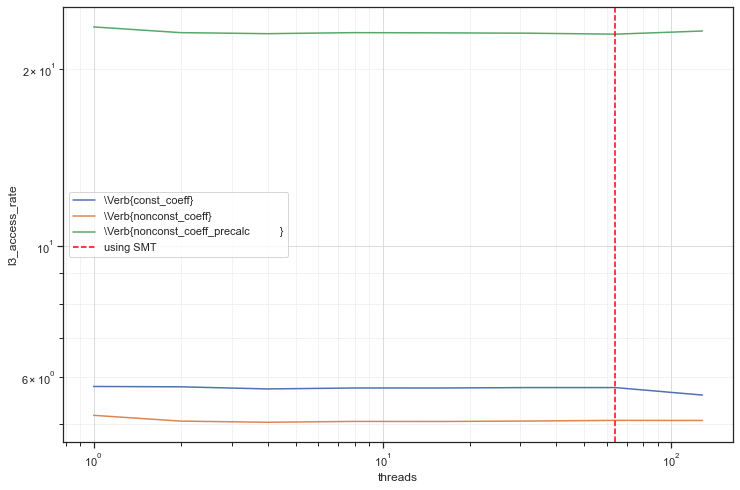

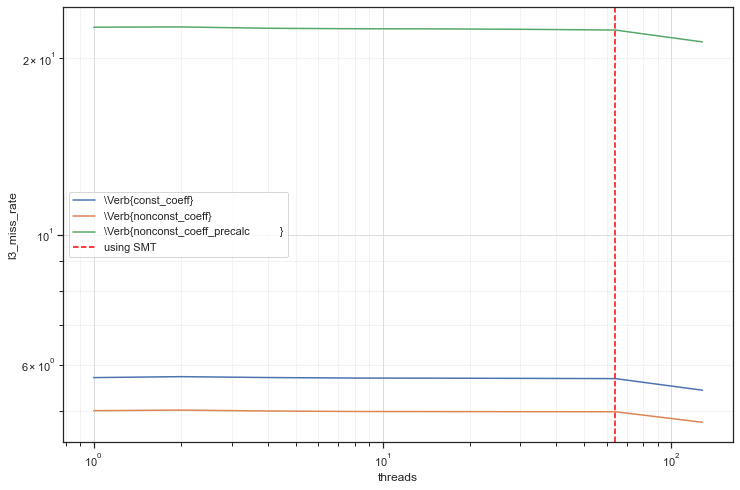

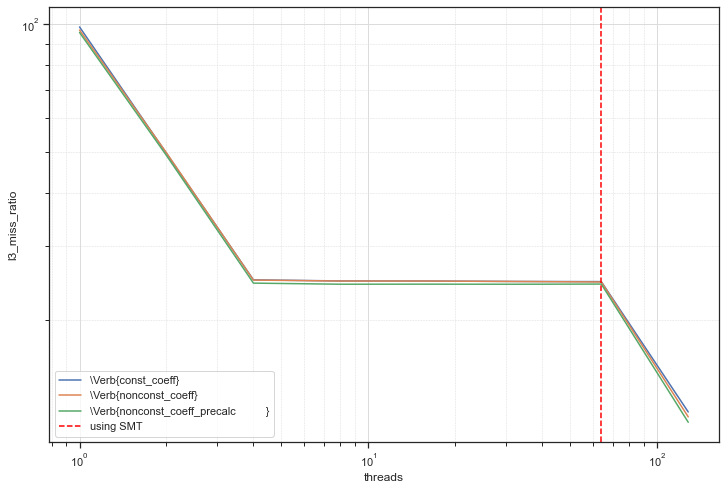

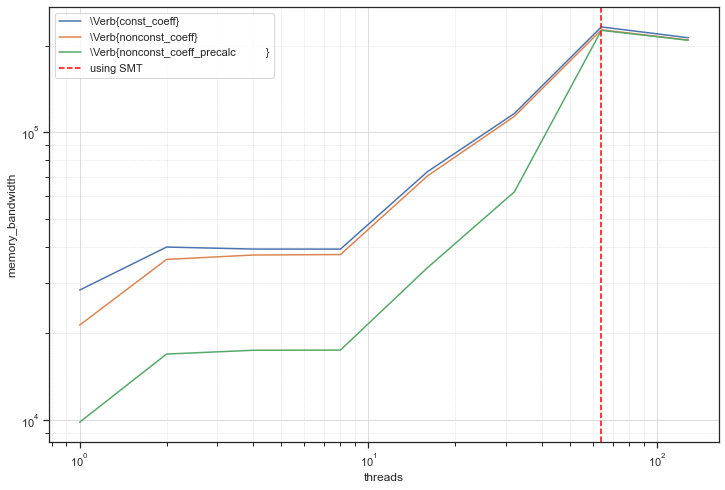

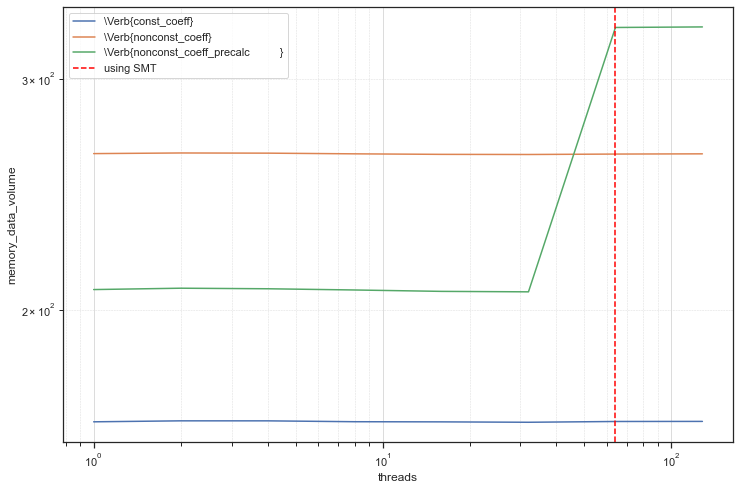

In [112]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_threads.csv')
data_frame = data_frame[data_frame.region_id == 'apply']
data_frame = data_frame[data_frame.obj_cols == 1600]

display(data_frame)

plot(p_data=data_frame,
    p_yId='l2d_load_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l2d_load_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l2_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l2_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_data_volumen',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_rate',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l3_miss_rate',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='l3_miss_ratio',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='memory_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)
plot(p_data=data_frame,
    p_yId='memory_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True)

##### [1024 x 1024 x 1024] vs [1600 x 1600 x 1600]

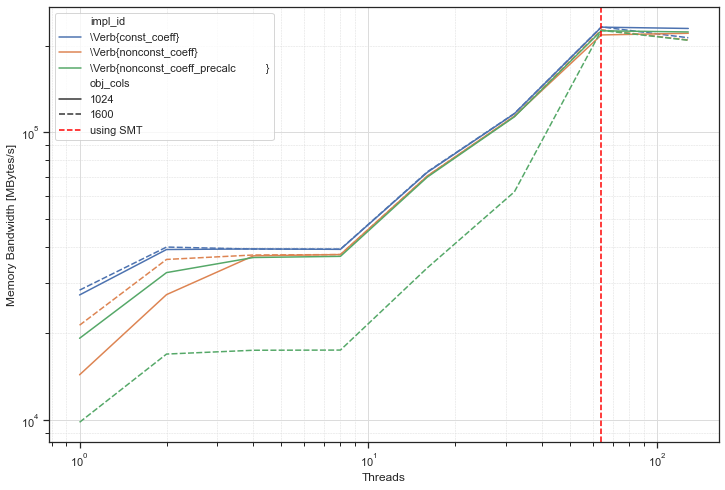

In [113]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_threads.csv')
data_frame = data_frame[data_frame.region_id == 'apply']

# display(data_frame)

plot(p_data=data_frame,
    p_yId='memory_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId='obj_cols',
    p_logScale=True,
    p_smt_marker=True,
    p_export_filename='memory_bandwidth.svg',
    p_xLabel="Threads",
    p_yLabel="Memory Bandwidth [MBytes/s]")